# NATS3200: Practical 4 (Multiple linear regression and model selection, weeks 4 and 5) 

### Predicting the Olympic Games 

The Olympic Games have always mixed pure sporting spectacle with national competition. During the Cold
War the USA and the Soviet Union competed fiercely to win the most medals in each games. On a somewhat
milder level, in Britain we often compare our medal count with that of Australia, one of our traditional
sporting rivals. If you were in the UK during the summers of 2012 and 2016 you cannot have missed the
excitement caused by the UK’s success relative to previous years.
Figure

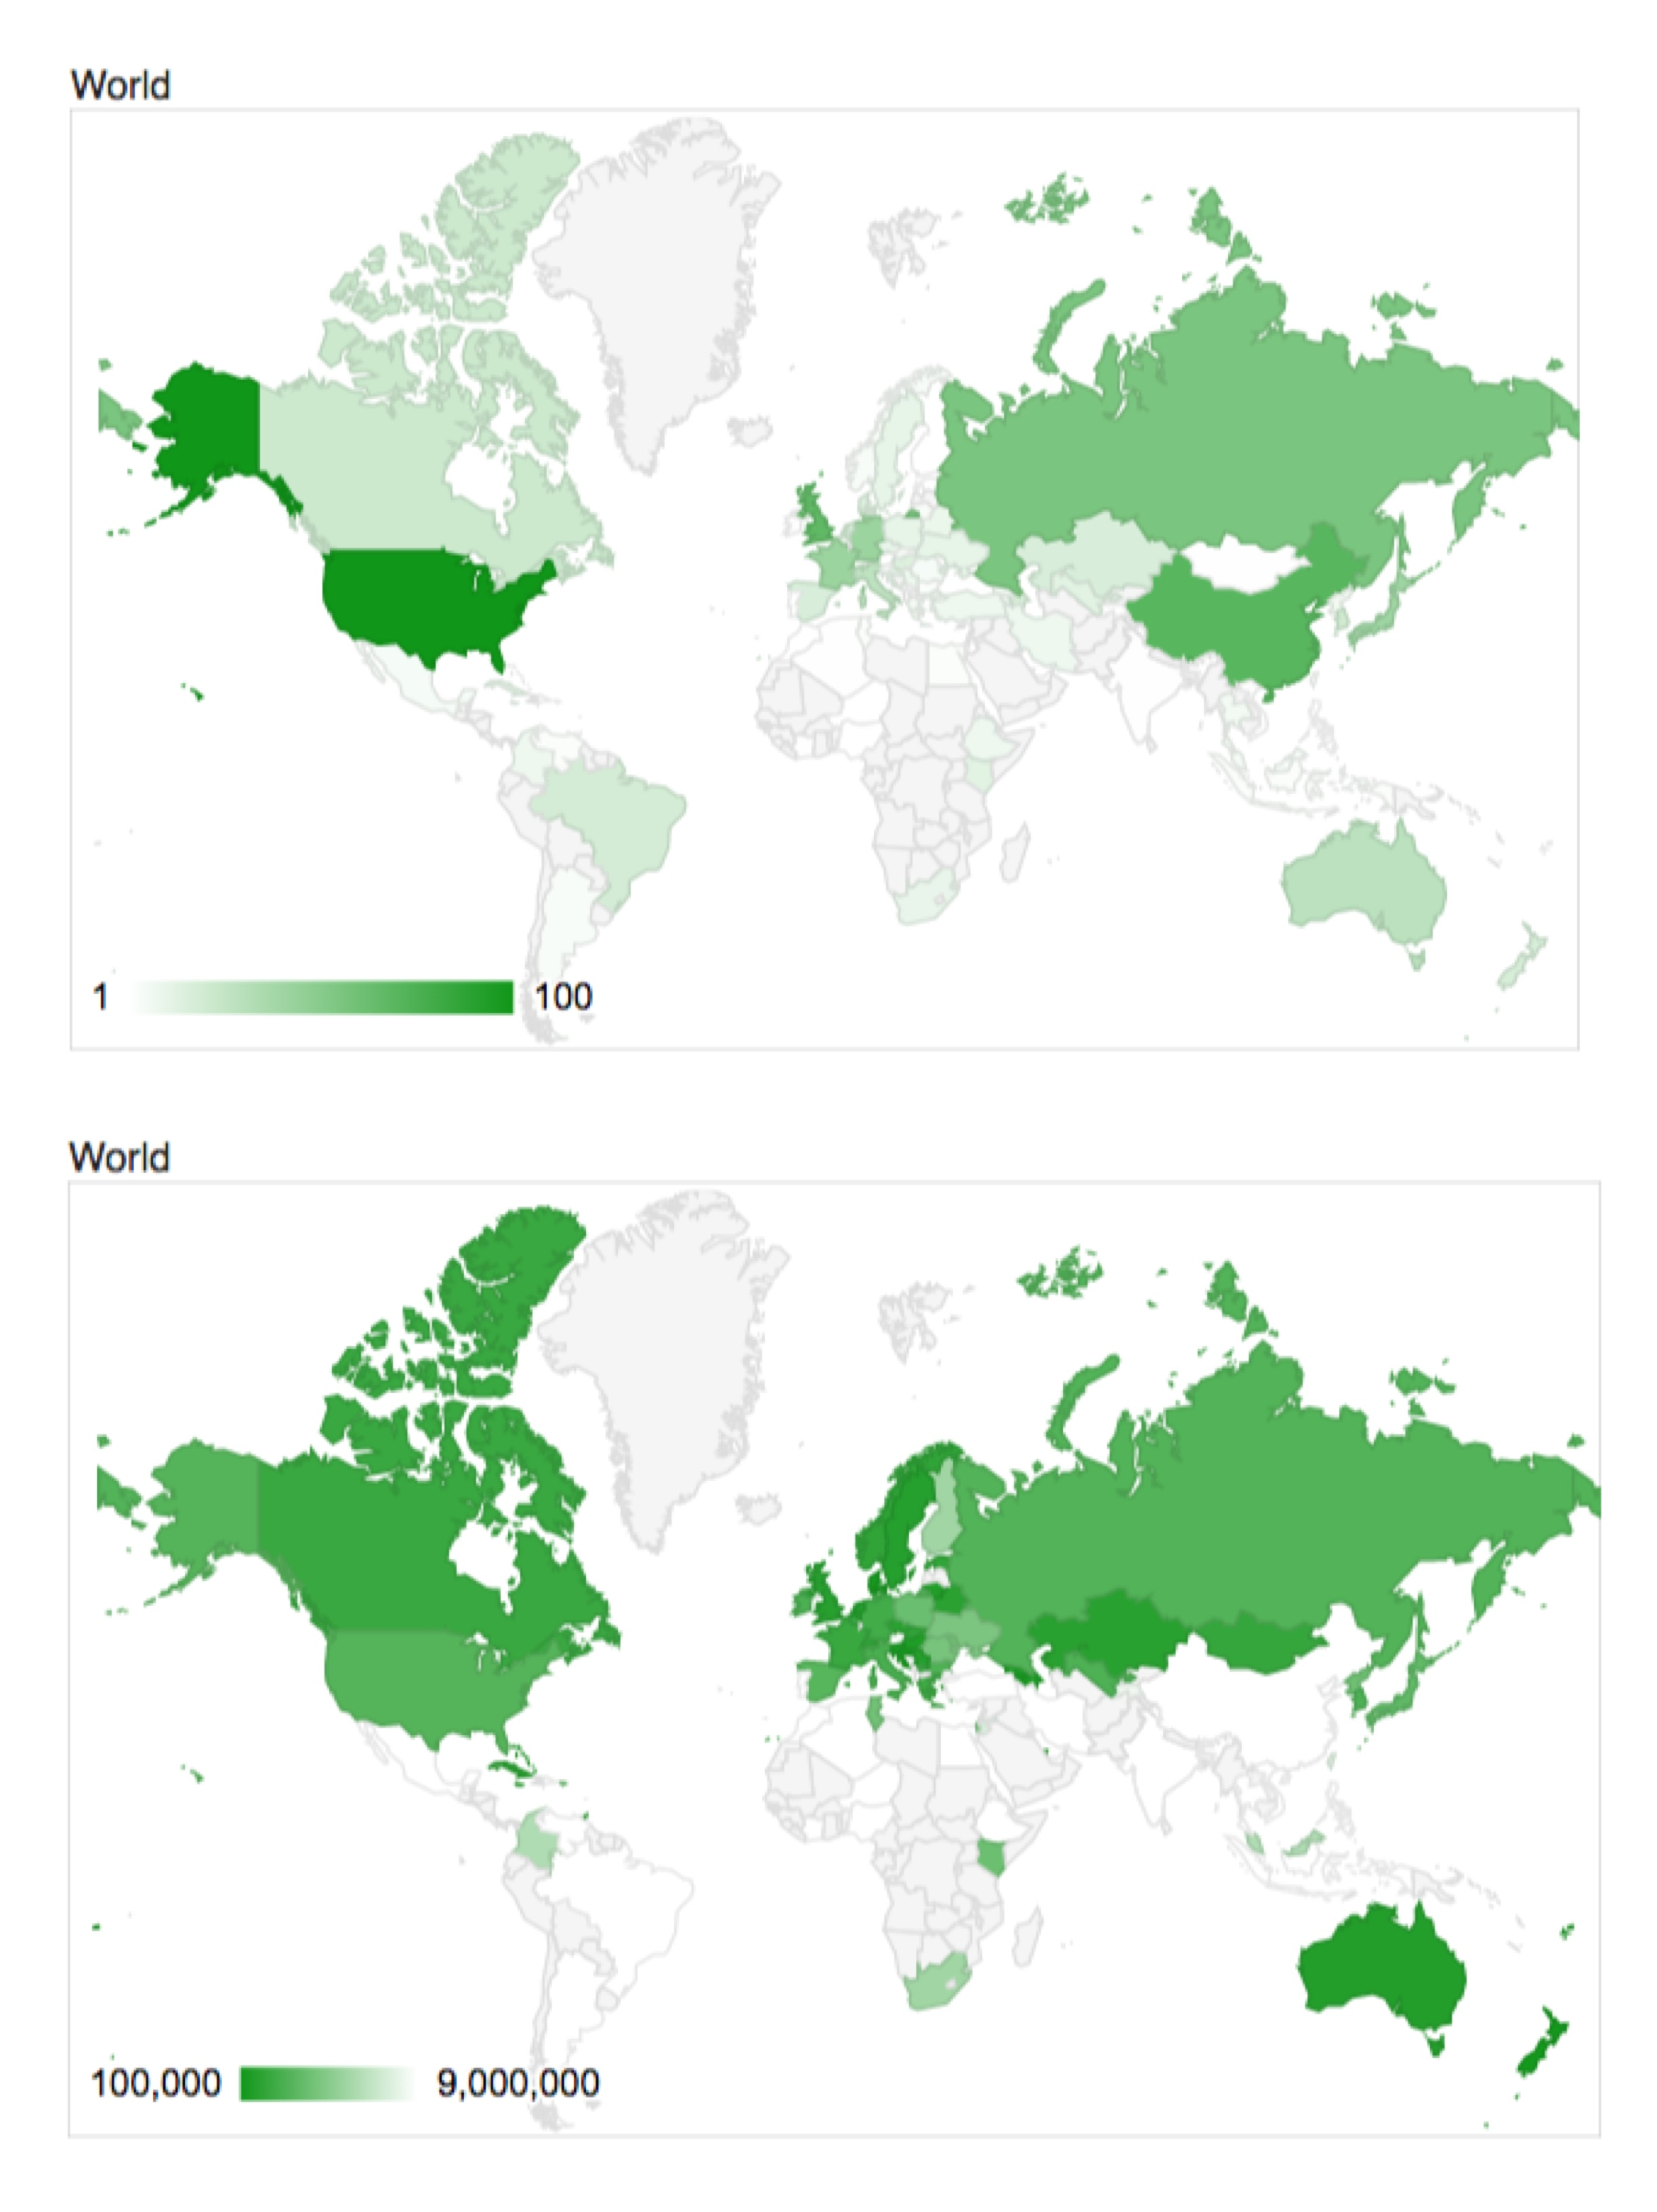
Figure 1: Total medals per country (top) and medals per capita (bottom) in the Rio 2016 Olympic Games
(credit: http://www.medalspercapita.com/)

This competition is usually expressed in terms of the number of medals won by each country’s athletes
((Figure 1 top panel). However, many interested watchers, especially those from smaller countries, have
pointed out that the medal table is hardly a fair reflection of a country’s sporting prowess. Some countries
have a strong tradition of sporting excellence, but are simply too small to make an impact in terms of total
medals. These commentators would rather look at the per capita medal count (Figure 1 bottom panel).

Looking at the per capita map above though, we see that large areas of the world are still very underrepresented.
Specifically, poorer countries do not win many medals per head of population. There are many
reasons for this, including a lack of investment in sport and facilities, and fewer individuals who are wealthy
enough to devote their life to training. As such, it has been suggested that we should compensate for wealth
when measuring a country’s Olympic performance.
In this practical you will investigate how the number of medals a country wins can be predicted from national
population and GDP, and how consistent these relationships are. This practical will run over this week and
the next.
Begin by downloading the data file medals.csv from MINERVA
This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

This data file contains the following infomation for 71 countries (those that won at least one gold medal in
each of the last three games):

* Country name (as recognised by the IOC)
* Population
* GDP (in billions of US dollars)
* Medals won in Beijing 2008, London 2012 and Rio 2016

**Tasks (Regression, week 4):**

0. Visual inspection of the data, what can you learn? (0.5)
1. Perform a linear regression to predict the medal count in 2008 and 2012 (separately, in two regressions)
from Population and GDP and report your results (not just by showing the summary of GLM). What is
the meaning of the coefficients you obtain? (1 mark)
2. How consistent are the effects of Population and GDP over time? (0.5 mark)
3. Using the regression for the 2012 medal count make a prediction for the results of 2016. (0.5 mark)
4. Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation
of the axes to make it these clearer. How good are the predictions? Which countries are outliers from
the trend? (1 mark)

**Tasks (Model Selection, week 5):**

5. Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP
alone; (iii) Population and GDP. Select the model that minimises the Akaike Information Criterion. (0.5 marks)
6. Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii)
Population and GDP. Does your result agree with the model selected by AIC? (1 mark)
7. Using the three fitted models from Q5, predict the results of Rio 2016. Which predicts best? Compare
this result with earlier answers. (1 mark)
8. Did we exploit all the information in the data? If not, repeat your analysis, does it improve the model
predictions? (1 mark)


**Presentation and bonus:**

8. Quality of presentation of report in Jupyter notebook (2 mark)
9. Bonus point: Justify why your work/report goes beyond just completing the tasks and deserves an extra mark (1 mark) 

**Submission of work:** 
The work must be submitted as an ipynb on minerva
* The filename must be Surname-problem4an5.ipynb
* The self-assessment must be added at the end of the ipynb. Mark each task above.

**Self-assessment:**
- Needs to be added at the end of your notebook
- Aim is that you give an honest reflection on how you completed the tasks, asign a mark for each task.
- You will need justify all your marks
- Declaration of integrity (That the work you submitted is yours, and that you marked it fairly)

**Deadline:** 5th March 2024, 5pm

**Task 0**

From the data it can be seen that the west get the majority of medals in both total count and GDP per captia, some expections to this are new zealand and australia. Using the GDP/medal shows a more even spread for the countries that have earned medals, closing the gap compared to the total number of medals where USA is far in the lead to the rest of the world.

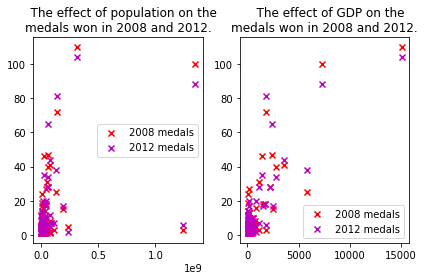

In [20]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
from statsmodels.formula.api import glm

data = pds.read_csv('medals.csv') # importing file
pop = data.iloc[:,2] # setting each column as a list (to produce seperate df's for clarity of analysis)
GDP = data.iloc[:,1]
countries = data.iloc[:,0]
medals8 = data.iloc[:,3]
medals12 = data.iloc[:,4]
medals16 = data.iloc[:,5]
plt.figure() # plotting the graphs on the same row

plt.subplot(1,2,1) 
# plotting the relationship of medals won to population size
plt.scatter(pop, medals8, color = 'r', marker = 'x', label = '2008 medals') 
plt.scatter(pop, medals12, color = 'm', marker = 'x', label = '2012 medals')
plt.legend(loc = 'best') # putting the legend in the best position to not hide data points
plt.title('''    The effect of population on the 
medals won in 2008 and 2012.''') # title

plt.subplot(1,2,2)
# plotting the relationship of medals won to GDP of country
plt.scatter(GDP, medals8, color = 'r', marker = 'x', label = '2008 medals')
plt.scatter(GDP, medals12, color = 'm', marker = 'x', label = '2012 medals')
plt.legend(loc = 'best') # putting the legend in the best position to not hide data points
plt.title('''    The effect of GDP on the 
medals won in 2008 and 2012.''') # title

plt.tight_layout()
plt.show()

These graphs show a weak linear correlation therefore showing that it is appropriate to use a generalised linear model to find the best model to fit.

**Task 1**

In [21]:
# analytical method for 2008
X = npy.column_stack([npy.ones(len(data.iloc[:,2])), data.iloc[:,2], data.iloc[:,1]]) # matrix with row of ones and population and GDP data
Y = npy.array([data.iloc[:,3]]).reshape(-1, 1) # column matrix of medal values
X_T = X.T # transposing the X matrix
# doing the dot product of X and its transpose, then getting the inverse matrix
XX_inv = npy.linalg.inv(npy.dot(X_T, X)) 
XXX = npy.dot(XX_inv ,X_T) # getting the dot product of the inverse matrix and X
beta = npy.dot(XXX, Y) # calculating the dot product of XXX and the medals column matrix to obtain the beta values

In [22]:
# glm method for 2008
df8 = pds.DataFrame({'y': medals8, 'x1': pop , 'x2': GDP}) # dataframe with columns for medals won in 2008, population, GDP
formula = 'medals8 ~ pop + GDP' # the formula to calculate the linear model
data8 = glm(formula, df8).fit() # computing the linear model

In [23]:
ci = data8.conf_int() # a matrix of the confidence intervals of the betas
betas8_glm = [] # list for the beta values calculated fromthe glm function 
lower_bounds8 = [] # list for the lower bounds of the confidence intervals for the betas calculated with glm
upper_bounds8 = [] # list for the upper bounds of the confidence intervals for the betas calculated with glm
terms = ['Intercept', 'pop', 'GDP'] # Titles of columns
betas8 = [] # list for betas obtained from the analytic method

for i in beta:
    betas8.append(format(i[0], '.2e')) # formating the betas from the analytic method and adding to new list

for i in terms:
    lower_bounds8.append(format(ci.loc[i, 0], '.2e')) # formatting and adding lower bounds of confidence intervals to list
    upper_bounds8.append(format(ci.loc[i, 1], '.2e')) # formatting and adding upper bounds of confidence intervals to list

for i in data8.params:
    betas8_glm.append(format(i, '.2e')) # formating the betas from the glm module and adding to new list

table2008 = pds.DataFrame({ 'Analytic ' : [betas8[0], betas8[1], betas8[2]], #creating a dataframe to compare the data
         'glm   ' : [betas8_glm[0], betas8_glm[1], betas8_glm[2]],
         '[0.025  ' : [lower_bounds8[0], lower_bounds8[1], lower_bounds8[2]],
         '0.975]  ' : [upper_bounds8[0], upper_bounds8[1], upper_bounds8[2]]
         })
table2008.index= ['Beta 0', 'Beta 1', 'Beta 2'] # labelling each row

print('''\033[4mA comparison between the beta values from different methods\033[0m 
            \033[4mfor the olympic medals won in 2008\033[0m 
            ''') #title

print(table2008.to_markdown()) # showing the table

A comparison between the beta values from different methods 
            for the olympic medals won in 2008 
            
|        |   Analytic  |   glm    |   [0.025   |   0.975]   |
|:-------|------------:|---------:|-----------:|-----------:|
| Beta 0 |    5.61     | 5.61     |   2.66     |   8.56     |
| Beta 1 |    8.43e-09 | 8.43e-09 |  -5.72e-09 |   2.26e-08 |
| Beta 2 |    0.00761  | 0.00761  |   0.00617  |   0.00905  |


As can be seen in the table, the values for each beta are the exact same for the analytical and glm method. As for beta 1 the confidence interval is about zero therefore can be assumed to be negligible.

In [5]:
# analytical method for 2012
X = npy.column_stack([npy.ones(len(data.iloc[:,2])), data.iloc[:,2], data.iloc[:,1]]) # matrix with row of ones and population and GDP data
Y = npy.array([data.iloc[:,4]]).reshape(-1, 1) # column matrix of medal values
X_T = X.T # transposing the X matrix
# doing the dot product of X and its transpose, then getting the inverse matrix
XX_inv = npy.linalg.inv(npy.dot(X_T, X))
XXX = npy.dot(XX_inv ,X_T) # getting the dot product of the inverse matrix and X
beta_ana = npy.dot(XXX, Y) # calculating the dot product of XXX and the medals column matrix to obtain the beta values

In [6]:
# glm method for 2012
df12 = pds.DataFrame({'Y': medals12, 'X1': pop , 'X2': GDP}) # dataframe with columns for medals won (2012), population, GDP
formula = 'medals12 ~ pop + GDP' # the formula to calculate the linear model
data12 = glm(formula, df12).fit() # computing the linear model

In [7]:
ci = data12.conf_int() # a matrix of the confidence intervals of the betas
betas12_glm = [] # list for the beta values calculated fromthe glm function
lower_bounds12 = [] # list for the lower bounds of the confidence intervals for the betas calculated with glm
upper_bounds12 = [] # list for the upper bounds of the confidence intervals for the betas calculated with glm
betas12 = [] # list for betas obtained from the analytic method

for i in beta_ana:
    betas12.append(format(i[0], '.2e'))  # formating the betas from the analytic method and adding to new list

for i in terms:
    lower_bounds12.append(format(ci.loc[i, 0], '.2e')) # formatting and adding lower bounds of confidence intervals to list
    upper_bounds12.append(format(ci.loc[i, 1], '.2e')) # formatting and adding upper bounds of confidence intervals to list

for i in data12.params:
    betas12_glm.append(format(i, '.2e')) # formating the betas from the glm module and adding to new list

table2012 = pds.DataFrame({ 'Analytic  ' : [betas12[0], betas12[1], betas12[2]], #creating a dataframe to compare the data
         'glm  ' : [betas12_glm[0], betas12_glm[1], betas12_glm[2]],
         '[0.025  ' : [lower_bounds12[0], lower_bounds12[1], lower_bounds12[2]],
         '0.975]  ' : [upper_bounds12[0], upper_bounds12[1], upper_bounds12[2]]
         })
table2012.index= ['Beta 0', 'Beta 1', 'Beta 2'] # labelling each row

print('''\033[4mA comparison between the beta values from different methods\033[0m 
            \033[4mfor the olympic medals won in 2012\033[0m 
            ''') #title

print(table2012.to_markdown()) # showing the table

A comparison between the beta values from different methods 
            for the olympic medals won in 2012 
            
|        |   Analytic   |    glm   |   [0.025   |   0.975]   |
|:-------|-------------:|---------:|-----------:|-----------:|
| Beta 0 |     6.08     | 6.08     |   3.14     |   9.02     |
| Beta 1 |     5.25e-09 | 5.25e-09 |  -8.85e-09 |   1.93e-08 |
| Beta 2 |     0.00756  | 0.00756  |   0.00613  |   0.009    |


As for the 2008 data, the betas for the analytical and glm method and the same, and beta 1 (population) has a confidence interval about zero therefore is negligible.

The meanings for each beta are as follows: Beta 0 is the intercept of the linear fit, Beta 1 is equivalent to the gradient of the fit (increase in medals per population increase) if GDP is kept constant, likewise Beta 2 is equivalent to the gradient of the fit (increase in medals per GDP increase) if population is kept constant.

**Task 2**

In [8]:

print('''       \033[4mThe results for the 2008 linear regression model\033[0m
''' + table2008.to_markdown())
print('')
print('''       \033[4mThe results for the 2012 linear regression model\033[0m
''' +table2012.to_markdown()) # reprinting the results for ease of analysis

       The results for the 2008 linear regression model
|        |   Analytic  |   glm    |   [0.025   |   0.975]   |
|:-------|------------:|---------:|-----------:|-----------:|
| Beta 0 |    5.61     | 5.61     |   2.66     |   8.56     |
| Beta 1 |    8.43e-09 | 8.43e-09 |  -5.72e-09 |   2.26e-08 |
| Beta 2 |    0.00761  | 0.00761  |   0.00617  |   0.00905  |

       The results for the 2012 linear regression model
|        |   Analytic   |    glm   |   [0.025   |   0.975]   |
|:-------|-------------:|---------:|-----------:|-----------:|
| Beta 0 |     6.08     | 6.08     |   3.14     |   9.02     |
| Beta 1 |     5.25e-09 | 5.25e-09 |  -8.85e-09 |   1.93e-08 |
| Beta 2 |     0.00756  | 0.00756  |   0.00613  |   0.009    |


For the effect population on medals won, beta 1 for 2008 and 2012 fall within eachothers confidence interval, showing there is not significant difference between them, but as mentioned before their interval also includes zero, therefore their effect on the medals won is negligible.

For the effect of GDP on medals won, the beta 2 values also fall within eachothers confidence interval, and are almost identical, showing that these effects are consistent over time, or that the change on this time scale is small enough to be neglible.

This therefore makes it appropriate to use the relation obtained from the data from 2012 to predict the data for 2016.

**Task 3+4**

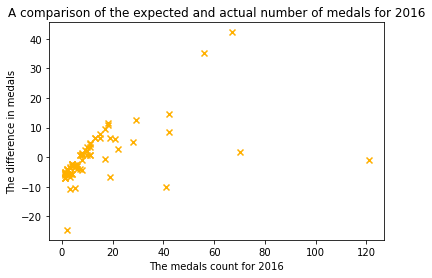

['Great Britain', 'India', 'Russian Federation']


In [9]:
# Using the regression for the 2012 medal count make a prediction for the results of 2016. (0.5 mark)
df16 = pds.DataFrame({'Y': medals16, 'X1': pop, 'X2': GDP}) # dataframe with columns for medals won in 2016, population, GDP
medals16_predicted = data12.predict(df16) # predicts medals for 2016 using linear regression parameters from 2012 data
diff = medals16- medals16_predicted # calculates difference between predicted and actual medal values.
plt.scatter(medals16, diff, color = '#FFB000', marker = 'x') # plots the difference in medals against the medals won in 2016
plt.ylabel('The difference in medals') # adding labels to the graph
plt.xlabel('The medals count for 2016')
plt.title('A comparison of the expected and actual number of medals for 2016')
plt.show()

outliers = [] # initialising a list to store the locations in the array of the anomalous countries
for i in diff:
    if i < -20 or i > 20: # finding the anomalies in the data
        outliers.append(countries[npy.where(diff == i)[0]].values[0]) # finding names of countries and adding to list
print(outliers)

In general the prediction is good, there is only a few outliers which are Great Britian, India, and the Russian Federation. The rest of the data is within the bounds of 15 medals. 

**Task 5**

In [25]:
formula = ['Y ~ X1', 'Y ~ X2', 'Y ~ X1 + X2'] # list of formulas to be tested
aic_list = [] # creating a list to store the aic value for each formula
for i in formula:
    model = glm(i, df12).fit() # for each formula running the glm fit
    aic_list.append(model.aic) # calculating the aic and adding it to list
min_formula = aic_list.index(min(aic_list)) # finding the minimum of the list
print(formula[min_formula]) # printing the formula that corresponds to the minimum of the list

Y ~ X2


This shows that the linear regression using only GDP minimises the AIC, so is the best model to use.

**Task 6**

In [11]:
from sklearn.model_selection import train_test_split
from scipy.stats import norm

best = [] # creating a list to record the best formula for each repeat
repeats = 100 # number of repeats to carry out the log likelihood calculation
for j in range(repeats):
    # splitting the data equally into training and test data
    train_data, test_data = train_test_split(df12, test_size=0.5) 

    predictive_log_likelihood = [] # initialising a list to store the LL values for each formula


    for i in formula:

        current_model = glm(i, train_data).fit() # calculating the linear fit for each formula using training data
        sigma = npy.sqrt(current_model.scale) # finding the standard deviation of the model  
        ypredict_mean = current_model.predict(test_data) # Get the predicted mean for each new data point
        ypredict_meandf=pds.DataFrame({'ypredict_mean': ypredict_mean}) # Putting the mean values into a dataframe

        # calculating the predictive log probability by summing the log probability of each output value in the 
        # test data
        predictive_log_likelihood.append(npy.sum(norm.logpdf(test_data[['Y']],
                                                             loc = ypredict_meandf[['ypredict_mean']], scale = sigma )))
    
    best.append(npy.argmax(predictive_log_likelihood)) # finding the largest LL and appending it to the best list

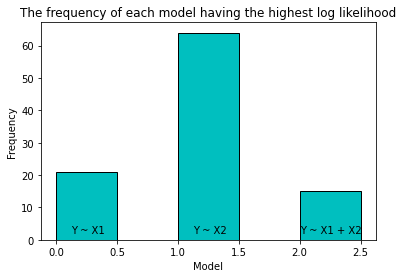

In [12]:
ModelNumber = npy.arange(0, 3, 0.5) # plotting a histogram of the times of wins each formula got.
plt.hist(best, bins = ModelNumber, edgecolor='black', color = 'c')
plt.xlabel("Model") # labelling axes
plt.ylabel("Frequency")
plt.title('The frequency of each model having the highest log likelihood')  # title
plt.text(0.125, 2 , formula[0]) # labelling each bin
plt.text(1.125, 2 , formula[1])
plt.text(2, 2 , formula[2])
plt.show()

The histogram shows that the linear regression using GDP alone is the most accurate, agreeing with the AIC method.

**Task 7**

In [13]:
#Using the three fitted models from Q5, predict the results of Rio 2016.
#Which predicts best? Compare this result with earlier answers. (1 mark)

df16 = pds.DataFrame({ 'Y': medals16, 'X1': pop , 'X2': GDP}) # new dataframe with relavent parameters
# using slightly different list names to prevent the wrong data being used
best16 = [] # creating a list to record the best formula for each repeat
reps = 100 # number of repeats to carry out the log likelihood calculation
for j in range(reps):
    # splitting the data equally into training and test data
    train_data, test_data = train_test_split(df16, test_size=0.5) 
    predictive_log_likelihood = [] # initiating list for LLs for each formula


    for i in formula:
        current_model = glm(i, train_data).fit() # calculating the linear fit for each formula using training data
        sigma = npy.sqrt(current_model.scale) # finding the standard deviation of the model   
        #Get the predicted mean for each new data point
        ypredict_mean = current_model.predict(test_data) # Get the predicted mean for each new data point
        ypredict_meandf=pds.DataFrame({'ypredict_mean': ypredict_mean}) # Putting the mean values into a dataframe
        #Now calculate the predictive log probability by summing the log probability of each output value in the 
        # test data.
        predictive_log_likelihood.append(npy.sum(norm.logpdf(test_data[['Y']],
                                                             loc = ypredict_meandf[['ypredict_mean']], scale = sigma )))

    best16.append(npy.argmax(predictive_log_likelihood)) # finding the largest LL and appending it to the best list

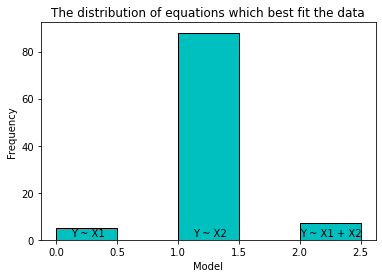

In [14]:
ModelNumber = npy.arange(0, 3, 0.5) 
plt.hist(best16, bins=ModelNumber, edgecolor='black', color = 'c') # plotting results in a histogram
plt.xlabel("Model") # labelling axes
plt.ylabel("Frequency")
plt.title('The distribution of equations which best fit the data') # title
plt.text(0.125, 1.5, formula[0]) # labelling bins
plt.text(1.125, 1.5, formula[1])
plt.text(2, 1.5, formula[2])
plt.show()

This prediction agrees with the best models in the previous tasks.

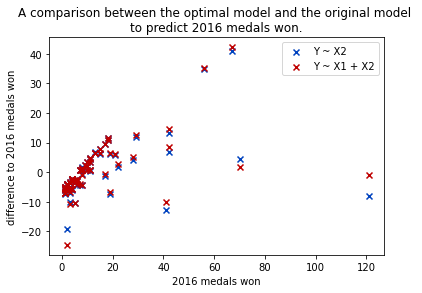

In [15]:
medals16_GDP = []
betas16_GDP = []
data16_GDP = glm('Y ~ X2', df16).fit() # obtaining betas for optimal formula using glm
for i in data16_GDP.params:
    betas16_GDP.append(i) # appending betas to list 
    
for i in range(len(GDP)):
    medals16_GDP.append(betas16_GDP[0] + GDP[i]*betas16_GDP[1]) # calculating datapoints for new formula
    
medals16_GDP_diff = medals16 - medals16_GDP # calculating difference of predictions to actual data
# plotting difference to actual data using optimal formula and old model (Task 3) used to predict data to compare
plt.scatter(medals16, medals16_GDP_diff,  marker = 'x', color = '#0042BF', label = 'Y ~ X2') 
plt.scatter(medals16, diff, marker = 'x', color = '#BF0000', label = 'Y ~ X1 + X2')
plt.legend(loc = 'best') # moving legend to position to not block data
plt.title('''A comparison between the optimal model and the original model 
to predict 2016 medals won.''') #title
plt.ylabel('difference to 2016 medals won') # labelling axes
plt.xlabel('2016 medals won')
plt.show()

This plot shows there is a very minor difference between the two models, however Y ~ GDP is more accurate as the datapoints are shifted more towards zero.

**Task 8**

In [16]:
# creating new dataframe with all data provided (done as easier to use Y and X then type names out)
df16_new = pds.DataFrame({ 'Y': medals16, 'X1': pop , 'X2': GDP, 'X3': medals12, 'X4': medals8 })

formula_new = ['Y ~ X1', 'Y ~ X2', 'Y ~ X3', 'Y ~ X4', 'Y ~ X1 + X2', 'Y ~ X1 + X3', 'Y ~ X1 + X4', 'Y ~ X2  + X4', 
               'Y ~ X3 + X4', 'Y ~ X2 + X3', 'Y ~ X1 + X2 + X3', 'Y ~ X1 + X2 + X4', 'Y ~ X2 + X3 + X4', 
               'Y ~ X1 + X3 + X4', 'Y ~ X1 + X2 + X3 + X4'] # all possible formulas
aic_list_test = [] #list to store aic values

for i in formula_new: # calucating aic values for each formula
    model = glm(i, df16_new).fit()
    aic_list_test.append(model.aic)
min_formula = aic_list_test.index(min(aic_list_test)) # finding the minimum aic
# printing corresponding forumla to minimum aic value
print('The values with the lowest AIC score is: ' + str(formula_new[min_formula]))

The values with the lowest AIC score is: Y ~ X1 + X2 + X3


In [17]:
# possible overfitting so using cross validation to verify
from sklearn.model_selection import train_test_split
from scipy.stats import norm

best16_new = [] # creating a list to record the best formula for each repeat
repeats1 = 100 # number of repeats to carry out the log likelihood calculation
for j in range(repeats1):
    # splitting the data equally into training and test data
    train_data16, test_data16 = train_test_split(df16_new, test_size=0.5) 
    predictive_log_likelihood = [] # initialising a list to store the LL values for each formula


    for i in formula_new:

        current_model = glm(i, train_data16).fit() # calculating the linear fit for each formula using training data
        sigma = npy.sqrt(current_model.scale) # finding the standard deviation of the model  
        ypredict_mean = current_model.predict(test_data16) # Get the predicted mean for each new data point
        ypredict_meandf=pds.DataFrame({'ypredict_mean': ypredict_mean}) # Putting the mean values into a dataframe

        # calculating the predictive log probability by summing the log probability of each output value in the 
        # test data
        predictive_log_likelihood.append(npy.sum(norm.logpdf(test_data16[['Y']],
                                                             loc = ypredict_meandf[['ypredict_mean']], scale = sigma )))
    
    best16_new.append(npy.argmax(predictive_log_likelihood)) # finding the largest LL and appending it to the best list


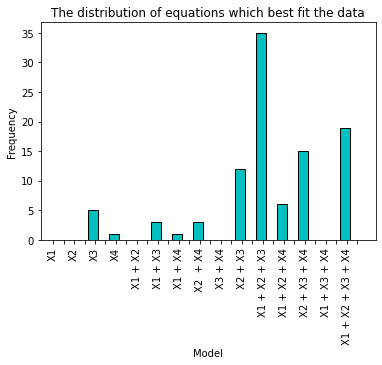

In [18]:
labels = [] # list for the bin labels (correct sequence with space between)
formula_label = [] # list for pure bin labels
for i in range(len(formula_new)): # creating labels for bins
    formula_label.append(formula_new[i].replace('Y ~ ', '')) # removing Y ~ part and adding to list
    labels.append(formula_label[i]) # adding to a final list with '' between so correct visualisation
    labels.append('')

ModelNumber = npy.arange(0.4, 15, 0.5)
# plotting histogram of LL frequency data for each formula
plt.hist(best16_new, bins=ModelNumber, edgecolor='black', color = 'c') 
plt.xlabel("Model") # labelling axes
plt.ylabel("Frequency")
plt.title('The distribution of equations which best fit the data') # title
plt.xticks(npy.arange(0.25, 15.25, 0.5), labels, rotation = 'vertical') # adding bin labels
plt.show()
# 'Y': medals16, 'X1': pop , 'X2': GDP, 'X3': medals12, 'X4': medals8

Both the AIC and log likelihood data agree that Y ~ X1 + X2 + X3 is the most accurate model, showing that GDP, population, and the medals won in 2012 have an effect on the trend.

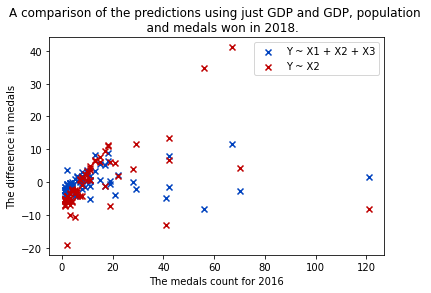

In [19]:
medals16_pred = [] # list for the predicted medals for the new best formula
betas16_glm = [] # list for betas of new best formula
data16_new = glm('Y ~ X1 + X2 + X3', df16_new).fit() # calculating betas for optimal formula
for i in data16_new.params:
    betas16_glm.append(i) # adding betas to list
    
for i in range(len(GDP)): # calculating the medal values using the optimal formula
    medals16_pred.append(betas16_glm[0] + GDP[i]*betas16_glm[2] + pop[i]*betas16_glm[1] + medals12[i]*betas16_glm[3])

medals16_diffs = medals16 - medals16_pred # calculating the difference to the actual medal values.

# plotting the difference of predicted values to actual values for the previous optimal formula and the new one.
plt.scatter(medals16, medals16_diffs, marker = 'x', color = '#0042BF', label = 'Y ~ X1 + X2 + X3')
plt.scatter(medals16, medals16_GDP_diff, marker = 'x', color = '#BF0000', label = 'Y ~ X2')
plt.title('''A comparison of the predictions using just GDP and GDP, population 
    and medals won in 2018. ''') # title
plt.legend(loc = 'best') # moving legend out of way of data
plt.ylabel('The difference in medals') # adding labels to the graph
plt.xlabel('The medals count for 2016')
plt.show()
# 'Y': medals16, 'X1': pop , 'X2': GDP, 'X3': medals12, 'X4': medals8

This graph shows that the new model considering population, GDP, and medals won in 2012 is much more accurate than the model just considering GDP as the data is much closer to the zero line (within 10 medals either side) and has no anomalies.

### Self reflection

**Task 0** - The data was interpreted and a linear fit was observed, to allow the assumption that a linear fit could be applied. **(0.5/0.5 mark)**

**Task 1** - The linear regression for both 2012 and 2008 were carried out using both the numerical and analytic (glm) method, the values from these methods were identical. The meaning for each beta was provided. **(1/1 marks)**

**Task 2** - The value of each beta for 2012 and 2008 was compared using the confidence intervals, this showed not significant difference in medals change with time, therefore making it appropriate to predict 2016 using 2012. **(/0.5 mark)**

**Task 3** - The .predict function was used successfully to predict the 2016 data. **(0.5/0.5 mark)**

**Task 4** - The predicted 2016 data was compared to the expected values, anomalies were succesfully identified. The graph was titled and labelled in a easy to consume manner. **(1/1 mark)**

**Task 5** - GDP alone was evaluated to be the the best model using the AIC. **(0.5/0.5 mark)**

**Task 6** - Cross validation also showed that GDP alone had the highest log likelihood, agreeing with the AIC. **(1/1 mark)**

**Task 7** - Using cross validation GDP alone was shown to predict 2016 medals won most accurately. This model was then compared to the prediction in Task 3. **(1/1 mark)**

**Task 8** - All the data given was used to formulate every possible equation, and using AIC and cross validation the most accurate model was shown to be population, GDP, the medals won in 2016. This was then compared to the the model used for task 7 shown it has a tighter distribution. **(1/1 mark)**

**Quality and Presentation** - All graphs and tables were titled, and labelled well. More visually appealing colours and data plots were used. All code was labelled thoroughly and tasks were organised in discrete sections.  **(2/2 marks)**

**Bonus Point** - Multiple extra graphs and tables were plotted for easier visualisation of the data and to confirm the results. **(0.5/1 mark)**

### Total: 9.5/10 marks